## Summary Stats
recall: we said that instances are sampled from the "universe of instances"

In stats... we say that a dataset is a sample from a population ("universe of stances")
* dataset = sample
* universe = population

Example: 
* sample: CPSC 222 how many emails do you receive in October 2020
* population: all college students nation wide (world wide)
    * expensive (time and money)
    
## More Key Stats Terms
* Parameter: any measurable characteristic of a population
    * e.g. population mean
* Statistic: any measurable characteristic of a sample
    * e.g. sample mean
* Descriptive statistics: organizing, summarizing, and presenting data in an informative way
    * e.g. summary stats like central tendencies, charting, etc.
* Inferential statistics: making inferences that go beyond known data
    * e.g. infer something about a population based on a sample
    * e.g. hypothesis testing, prediction with linear regression, machine learning, ... 

## Summary Stats
A summary stat summarizes data into a single value or set of values

Number of instances

In [1]:
import pandas as pd

x = [8, 5, 4, 9, 8, 6]
ser = pd.Series(x)

print("number of instances:", ser.shape, len(ser))

number of instances: (6,) 6


Min/max (not on a nominal scale)

In [2]:
print("min:", ser.min(), "max:", ser.max())

min: 4 max: 9


### Central Tendency
Central tendency represents the middle values of a data distribution

Mid value ((min + max) / 2)

In [3]:
print("mid value:", (ser.min() + ser.max()) / 2)

mid value: 6.5


Arithmetic mean (average)
* Sensitive to outliers (extreme)
* Only makes for numeric (continuous) measurement scales

In [4]:
print("mean:", ser.mean())

mean: 6.666666666666667


Median (middle the value in a list of sorted values)
* If the list has an even number of instances, the median is halfway between the two middle values

In [5]:
print(ser.sort_values())
print("median:", ser.median())

2    4
1    5
5    6
0    8
4    8
3    9
dtype: int64
median: 7.0


Mode (most frequently occurring value(s))

In [6]:
x = [8, 5, 4, 9, 8, 6, 6]
ser = pd.Series(x)
print("mode:", ser.mode())

mode: 0    6
1    8
dtype: int64


## Data Dispersion (Spread)
Range (max - min)

In [7]:
print(ser.max() - ser.min())

5


Quantiles (roughly equalized partitions of the data (in sorted order))
* 2 quantiles - 1 data point that divides the dataset into 2 halves (AKA median)
* quartiles - 3 data points that divide the dataset into 4 quarters
* percentiles - 99 data points that divide the dataset into 100 groups
    * 25th percentile = 1st quartile
    * 50th percentile = 2nd quartile = median
    * 75th percentile = 3rd quartile
* IQR (interquartile range) = 75th percentile - 25th percentile 

In [10]:
print(ser.sort_values())
print("25th percentile:", ser.quantile([0.25]))
# only use numbers in the dataset
first_quartile_index = int(0.25 * len(ser))
print("25th percentile (point in dataset):", ser.iloc[first_quartile_index])

2    4
1    5
5    6
6    6
0    8
4    8
3    9
dtype: int64
25th percentile: 0.25    5.5
dtype: float64
25th percentile (point in dataset): 5


## Box Plot Demo
A box plot is a great visualization of spread in a dataset (or sets of datasets). 

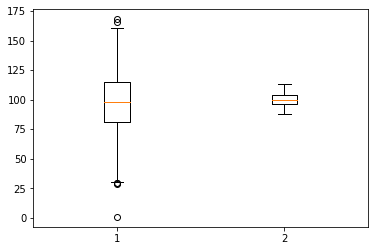

In [20]:
import matplotlib.pyplot as plt
import numpy as np

mean = 100
stdev = 25
x1 = np.random.normal(mean, stdev, 1000)
x2 = np.random.normal(mean, 5, 100)

# median is the orange line in the middle of the box
# IQR is the box
# +/- 1.5 * IQR is the "whiskers" that extend from the box
# outliers are displayed as the circles outside the whiskers

plt.boxplot([x1, x2])
plt.show()

Variance (spread from the mean)
* High variance means the data is spread out from the mean
* Low variance means the data is clustered around the mean

Standard deviation (square root of the variance)
* Used more frequently for a few reasons...
* It is in the same units as the mean

In [22]:
print("variance:", ser.var())
print("standard deviation:", ser.std(), np.sqrt(ser.var()))

variance: 3.285714285714286
standard deviation: 1.8126539343499315 1.8126539343499315


## Histogram Demo
How does the standard deviation affect the shape of a normal distribution?

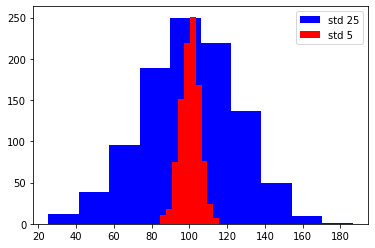

In [53]:
mean = 100
stdev = 25
num_samples = 1000
x1 = np.random.normal(mean, stdev, num_samples)
stdev = 5
x2 = np.random.normal(mean, stdev, num_samples)

plt.figure()
plt.hist(x1, facecolor="blue", label="std 25")
plt.hist(x2, facecolor="red", label="std 5")
plt.legend()
plt.show()

## Empirical Rule for Normal Data
* (about) 68% of the data is within +/- 1 standard deviation of the mean
* (about) 95% of the data is within +/- 2 standard deviations of the mean
* (about) 99.7% of the data is within +/- 3 standard deviations of the mean

Let's "prove" this rule for our x1 dataset

In [54]:
mean = 100
stdev = 25
num_samples = 1000
x1 = np.random.normal(mean, stdev, num_samples)

count_within_1stdev = 0
count_within_2stdev = 0
count_within_3stdev = 0

for value in x1:
    if mean - stdev <= value <= mean + stdev: # [mean - stdev, mean + stdev]
        count_within_1stdev += 1
    if mean - 2 * stdev <= value <= mean + 2 * stdev: # [mean - 2stdev, mean + 2stdev]
        count_within_2stdev += 1
    if mean - 3 * stdev <= value <= mean + 3 * stdev: # [mean - 3stdev, mean + 3stdev]
        count_within_3stdev += 1
        
print("+/- 1 stdev:", count_within_1stdev / num_samples * 100, "%")
print("+/- 2 stdev:", count_within_2stdev / num_samples * 100, "%")
print("+/- 3 stdev:", count_within_3stdev / num_samples * 100, "%")

+/- 1 stdev: 67.4 %
+/- 2 stdev: 95.7 %
+/- 3 stdev: 99.7 %
